In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
# load data
# rows in X are subject major order, i.e. rows 0-9 are all samples from subject 0, rows 10-19 all samples from subject 1, etc.
# columns in X are in feature_type major order, i.e. columns 0-47 are alpha band power, eyes closed, electrodes 0-48
# feature identifiers for all columns in X are stored in feature_names.csv
X = np.loadtxt('data.csv', delimiter=',') 
y = np.loadtxt('labels.csv', delimiter=',')
with open('feature_names.csv') as f:
    csvreader = csv.reader(f, delimiter=',')
    feature_names = [row for row in csvreader][0]

In [4]:
features_df = pd.DataFrame(data=X, columns=feature_names)
features_df

,alpha_ec_0,alpha_ec_1,alpha_ec_2,alpha_ec_3,alpha_ec_4,alpha_ec_5,alpha_ec_6,alpha_ec_7,alpha_ec_8,alpha_ec_9,...,ratio_theta_38,ratio_theta_39,ratio_theta_40,ratio_theta_41,ratio_theta_42,ratio_theta_43,ratio_theta_44,ratio_theta_45,ratio_theta_46,ratio_theta_47
0,0.111840,0.123870,0.128580,0.113240,0.105710,0.106900,0.107560,0.110640,0.108750,0.158930,...,0.57161,0.73870,0.58709,0.55198,0.54811,0.57869,0.59345,0.60436,0.56294,1.01440
1,0.298340,0.268810,0.262390,0.380090,0.343580,0.285000,0.247910,0.250330,0.260470,0.260160,...,0.35142,0.32788,0.43164,0.49603,0.40680,0.31283,0.66352,0.58386,0.46658,0.74867
2,0.369120,0.395870,0.389990,0.257720,0.405540,0.441990,0.440040,0.399470,0.315460,0.283480,...,0.61924,0.86506,1.09310,0.31759,0.36353,0.50553,0.33478,0.49383,0.62363,0.61417
3,0.761200,0.777260,0.770420,0.601610,0.701830,0.727250,0.762450,0.789040,0.729840,0.522360,...,0.23456,0.25090,0.43196,0.71301,0.53340,0.28528,0.68135,0.66315,0.25250,0.85448
4,0.167700,0.151460,0.147140,0.157280,0.149650,0.141540,0.132280,0.127600,0.143510,0.172520,...,1.82160,1.73190,1.24420,2.76220,3.00930,2.43520,2.53070,2.58470,2.00770,2.29460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.079822,0.081258,0.079273,0.083723,0.069784,0.063498,0.061792,0.059784,0.066457,0.077352,...,1.31050,1.16220,0.95190,2.32520,1.87490,1.74620,2.72400,2.71860,2.82880,1.23630
176,0.346500,0.362790,0.343660,0.277240,0.316030,0.379750,0.420140,0.452390,0.421380,0.250020,...,0.69648,0.67680,0.82459,0.37865,0.45749,0.61751,0.35155,0.48109,0.65537,0.64262
177,0.159210,0.157820,0.169680,0.178980,0.140980,0.132490,0.126600,0.130490,0.149720,0.222240,...,1.04600,0.85727,0.64390,0.87481,1.09470,0.99918,0.65529,0.63907,0.62307,1.07070
178,0.941110,0.952930,0.950500,0.726600,0.766260,0.655290,0.636660,0.645460,0.763470,0.841900,...,1.14790,0.94833,0.59572,0.80736,0.71848,0.96166,0.98636,0.99212,0.97502,0.97734


In [5]:
from sklearn.model_selection import train_test_split
#Now using the same model, compare without performing dimenstionality reduction
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [6]:
#Seeing that PCA made no difference, we will try to seek the importance of the features using a tree regressor.
from sklearn.ensemble import RandomForestRegressor
tree = RandomForestRegressor(random_state=1, max_depth=100)
tree.fit(X,y)

RandomForestRegressor(max_depth=100, random_state=1)

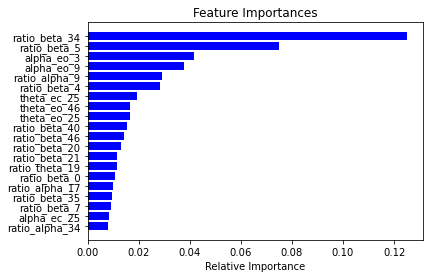

In [7]:
#Determine feature importance using the tree regressor
features = features_df.columns
importances = tree.feature_importances_
indices = np.argsort(importances)[-20:]  # top 20 features (others are not as effective as they can be)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
#After narrowing down from 432 features, we clearly see that a lot of features have little to no effect on the
#model performance, hence the plot below determines well which features should be kept and which should be dropped

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, random_state=42)
clf.fit(X, y)

RandomForestClassifier(max_depth=100, random_state=42)

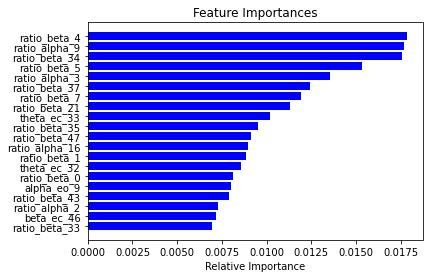

In [9]:
#Determine feature importance using the tree regressor
features = features_df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[-20:]  # top 20 features (others are not as effective as they can be)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
#After narrowing down from 432 features, we clearly see that a lot of features have little to no effect on the
#model performance, hence the plot below determines well which features should be kept and which should be dropped

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

DecisionTreeClassifier(random_state=42)

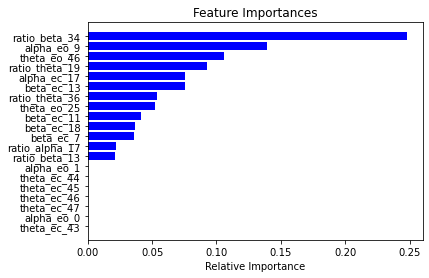

In [11]:
#Determine feature importance using the tree regressor
features = features_df.columns
importances = dt.feature_importances_
indices = np.argsort(importances)[-20:]  # top 20 features (others are not as effective as they can be)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
#After narrowing down from 432 features, we clearly see that a lot of features have little to no effect on the
#model performance, hence the plot below determines well which features should be kept and which should be dropped

In [14]:
#Pick features using select from model library in scikit_learn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
# lr = LogisticRegression().fit(X_train, y_train)
main_model = SVC(kernel = "linear").fit(X, y)
feature = SelectFromModel(main_model)
Fit = feature.fit_transform(X, y)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    Fit, y, test_size=0.2, random_state=42)

In [15]:
#Fit & Train model on new feature dims
svc = SVC(kernel = "linear").fit(X_train_1,y_train_1)
preds_1 = svc.predict(X_test_1)
true_class = 0
for i,j in zip(preds_1,y_test_1):
    if(i == j):
        true_class+=1
print(f"{true_class/len(preds_1)*100}%")
#We can notice a better performance than the PCA and the normal version of the code !

91.66666666666666%


In [ ]:
from sklearn.feature_selection import RFECV
rfe_lr = LogisticRegression(solver='lbfgs')
rfe_svc.fit(X_train, y_train)
rfe = RFECV(rfe_lr, cv = 5)
rfe.fit(X_train, y_train)
preds = rfe_lr.predict(X_test)
true_class = 0
for i,j in zip(preds,y_test):
    if(i == j):
        true_class+=1
print(f"{true_class/len(preds)*100}%")
#We can notice a better performance than the PCA and the normal version of the code !

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
svc_2 = SVC(kernel = "linear").fit(X,y)
sfs = SequentialFeatureSelector(svc_2,k_features='best',forward = False ,n_jobs=-1)
sfs.fit(X,y)